# Grab Canola Stock Price

In [19]:
import matplotlib.pyplot as plt

Stock historical values from https://www.investing.com/commodities/canola-futures-historical-data since 2002

In [5]:
import pandas as pd

# Read the CSV file
file_path = '/Users/clintonboyda/Documents/GitHub/Palette_Cohort_4/Data/Canola Futures Historical Data.csv'
df = pd.read_csv(file_path)

df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/11/2023,702.70,704.60,707.60,700.80,18.93K,-0.27%
1,10/10/2023,704.60,706.30,706.90,700.50,32.63K,-0.84%
2,10/06/2023,710.60,710.90,715.90,707.00,14.97K,-0.08%
3,10/05/2023,711.20,710.60,714.00,704.30,25.32K,0.06%
4,10/04/2023,710.80,718.90,719.40,710.50,15.87K,-0.92%


In [10]:
# To average the annual price, we first need to extract the year from the 'Date' column and create a new column for it
df['Year'] = df['Date'].dt.year

# Convert the 'Price' column to a numeric type, removing any non-numeric characters if necessary
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop any rows where 'Price' is NaN, if any
df.dropna(subset=['Price'], inplace=True)

# Group by 'Year' and calculate the mean price for each year
df_grouped_by_year = df.groupby('Year')['Price'].mean().reset_index()

df_grouped_by_year.head

<bound method NDFrame.head of     Year       Price
0   2010  510.802105
1   2011  559.861847
2   2012  600.502400
3   2013  560.514000
4   2014  441.428400
5   2015  474.099200
6   2016  484.616400
7   2017  509.578313
8   2018  503.489600
9   2019  456.565200
10  2020  497.180478
11  2021  840.449519
12  2022  860.742537
13  2023  774.506701>

In [16]:
# Convert stock price from tonnes to bushels to match our GIS data
specific_conversion_factor = 1 / 44.092  # 1 tonne = 44.092 bushels

# Apply the specific conversion factor to the 'Price' column
df_grouped_by_year['Price_per_bushel'] = df_grouped_by_year['Price'] * specific_conversion_factor

# Rename the 'Price' column to 'Price_per_Tonne'
df_grouped_by_year.rename(columns={'Price': 'Price_per_Tonne'}, inplace=True)

# Display the first few rows of the DataFrame to check the conversion
df_grouped_by_year.head()

,Year,Price_per_Tonne,Price_per_bushel_specific,Price_per_bushel
0,2010,510.802105,11.584916,11.584916
1,2011,559.861847,12.697583,12.697583
2,2012,600.502400,13.619305,13.619305
3,2013,560.514000,12.712374,12.712374
4,2014,441.428400,10.011530,10.011530


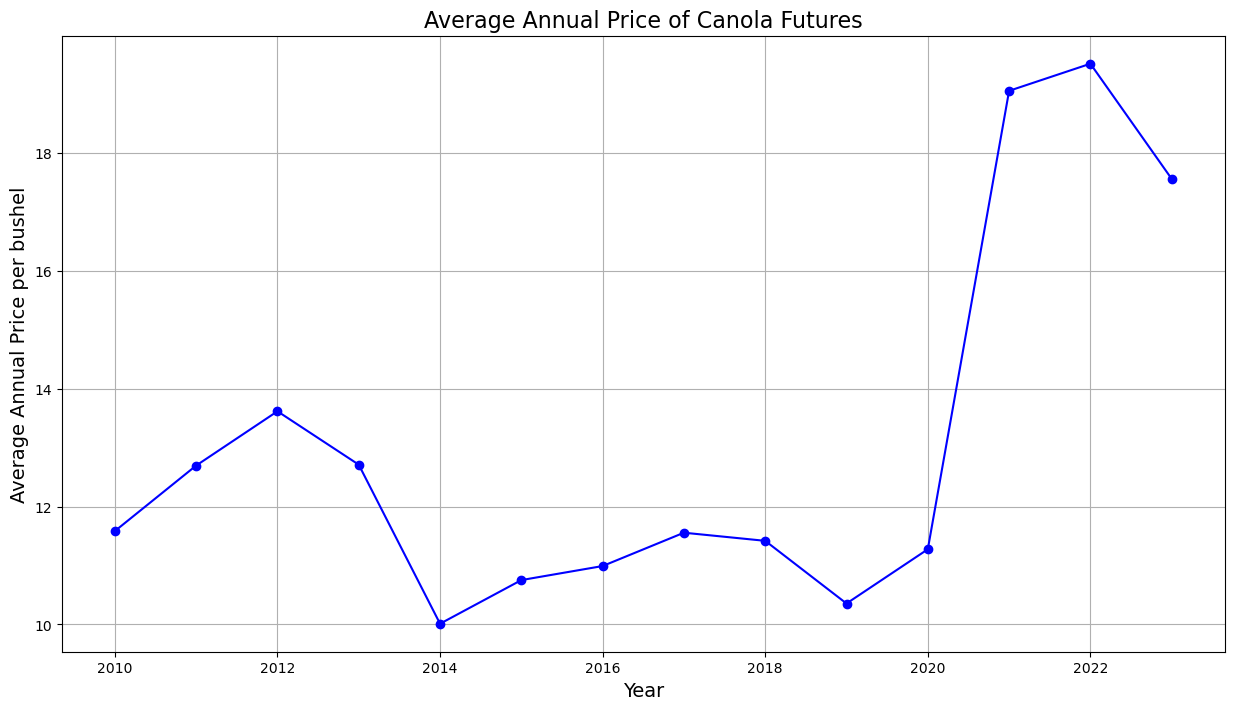

In [18]:
# Plotting the averaged annual price data
plt.figure(figsize=(15, 8))
plt.plot(df_grouped_by_year['Year'], df_grouped_by_year['Price_per_bushel'], marker='o', linestyle='-', color='b')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Annual Price per bushel', fontsize=14)
plt.title('Average Annual Price of Canola Futures', fontsize=16)
plt.grid(True)
plt.show()